In [1]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
import numpy as np

In [4]:
#load breast cancer dataset from sklearn
cancer_df = load_breast_cancer()
type(cancer_df)

sklearn.utils.Bunch

## Explore the dataset

In [5]:
#explore the features of the sklearn dataset
cancer_df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
cancer_df.data.shape

(569, 30)

In [7]:
cancer_df.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
cancer_df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
cancer_df.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
cancer_df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
len(cancer_df.feature_names)

30

In [12]:
print(cancer_df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Split training and test data

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer_df.data, cancer_df.target, test_size=0.20)

# N = No of rows
# D = No of cols/features

N, D = X_train.shape

In [17]:
X_train[:3]

array([[1.364e+01, 1.634e+01, 8.721e+01, 5.718e+02, 7.685e-02, 6.059e-02,
        1.857e-02, 1.723e-02, 1.353e-01, 5.953e-02, 1.872e-01, 9.234e-01,
        1.449e+00, 1.455e+01, 4.477e-03, 1.177e-02, 1.079e-02, 7.956e-03,
        1.325e-02, 2.551e-03, 1.467e+01, 2.319e+01, 9.608e+01, 6.567e+02,
        1.089e-01, 1.582e-01, 1.050e-01, 8.586e-02, 2.346e-01, 8.025e-02],
       [2.742e+01, 2.627e+01, 1.869e+02, 2.501e+03, 1.084e-01, 1.988e-01,
        3.635e-01, 1.689e-01, 2.061e-01, 5.623e-02, 2.547e+00, 1.306e+00,
        1.865e+01, 5.422e+02, 7.650e-03, 5.374e-02, 8.055e-02, 2.598e-02,
        1.697e-02, 4.558e-03, 3.604e+01, 3.137e+01, 2.512e+02, 4.254e+03,
        1.357e-01, 4.256e-01, 6.833e-01, 2.625e-01, 2.641e-01, 7.427e-02],
       [1.025e+01, 1.618e+01, 6.652e+01, 3.242e+02, 1.061e-01, 1.111e-01,
        6.726e-02, 3.965e-02, 1.743e-01, 7.279e-02, 3.677e-01, 1.471e+00,
        1.597e+00, 2.268e+01, 1.049e-02, 4.265e-02, 4.004e-02, 1.544e-02,
        2.719e-02, 7.596e-03, 1.128e

In [18]:
X_train.shape

(455, 30)

## Scale the data

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build TensorFlow model 

In [22]:
# Build a model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [23]:
# Train the model for 100 epochs
model_train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
15/15 [==============================] - 3s 106ms/step - loss: 111.4194 - accuracy: 0.4223 - val_loss: 119.9504 - val_accuracy: 0.3684
Epoch 2/100
15/15 [==============================] - 0s 9ms/step - loss: 113.2594 - accuracy: 0.3665 - val_loss: 107.3363 - val_accuracy: 0.3684
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 96.4604 - accuracy: 0.3923 - val_loss: 95.0853 - val_accuracy: 0.3684
Epoch 4/100
15/15 [==============================] - 0s 8ms/step - loss: 90.2761 - accuracy: 0.3547 - val_loss: 82.5693 - val_accuracy: 0.3684
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 73.7018 - accuracy: 0.3829 - val_loss: 70.4272 - val_accuracy: 0.3684
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 61.1980 - accuracy: 0.3843 - val_loss: 58.2269 - val_accuracy: 0.3684
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 52.7050 - accuracy: 0.3675 - val_loss: 45.7770 - val_accuracy: 

15/15 [==============================] - 0s 8ms/step - loss: 1.4334 - accuracy: 0.8193 - val_loss: 1.3561 - val_accuracy: 0.7807
Epoch 59/100
15/15 [==============================] - 0s 7ms/step - loss: 1.3051 - accuracy: 0.8176 - val_loss: 1.3235 - val_accuracy: 0.8070
Epoch 60/100
15/15 [==============================] - 0s 7ms/step - loss: 1.5308 - accuracy: 0.8050 - val_loss: 1.3078 - val_accuracy: 0.7719
Epoch 61/100
15/15 [==============================] - 0s 8ms/step - loss: 1.0986 - accuracy: 0.8256 - val_loss: 1.2838 - val_accuracy: 0.7807
Epoch 62/100
15/15 [==============================] - 0s 7ms/step - loss: 1.1617 - accuracy: 0.8331 - val_loss: 1.2611 - val_accuracy: 0.7807
Epoch 63/100
15/15 [==============================] - 0s 14ms/step - loss: 1.2763 - accuracy: 0.8134 - val_loss: 1.2232 - val_accuracy: 0.8070
Epoch 64/100
15/15 [==============================] - 0s 7ms/step - loss: 1.1730 - accuracy: 0.7995 - val_loss: 1.2434 - val_accuracy: 0.7456
Epoch 65/100
15/15

In [25]:
# Evaluate the model 

print("Train data accuracy:")
print(model.evaluate(X_train, y_train))
print("Test data accuracy:")
print(model.evaluate(X_test, y_test))

Train data accuracy:
15/15 [==============================] - 0s 1ms/step - loss: 0.7208 - accuracy: 0.8527
[0.7207844257354736, 0.8527472615242004]
Test data accuracy:
4/4 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.8333
[0.6052404642105103, 0.8333333134651184]


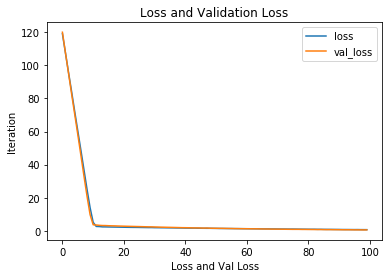

In [27]:
#There is a loss in every iteration
import matplotlib.pyplot as plt
plt.plot(model_train.history['loss'], label='loss')
plt.plot(model_train.history['val_loss'], label='val_loss')
plt.title("Loss and Validation Loss", loc='center')
plt.xlabel("Loss and Val Loss")
plt.ylabel("Iteration")
plt.legend();

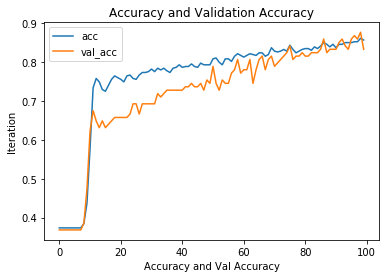

In [28]:
# Plot accuracy

#There is an increasing accuracy in every iteration

import matplotlib.pyplot as plt
plt.plot(model_train.history['accuracy'], label='acc')
plt.plot(model_train.history['val_accuracy'], label='val_acc')
plt.title("Accuracy and Validation Accuracy", loc='center')
plt.xlabel("Accuracy and Val Accuracy")
plt.ylabel("Iteration")
plt.legend();

In [31]:
# Calculating predictions

y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
y_pred


array([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [32]:
# Calculate Accuracy by model

#Accuracy: 0.8333
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.8333


[0.6052404642105103, 0.8333333134651184]